In [1]:
# Import modules:
import sys
import gmsh
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Simple 2d geometry:
#          D----C
#         /     |                 D1 | D2
#  F-----E      |   -> subdomains -------
#  |            |                 D3 | D4
#  A------------B
h = 2
x_down = 15
x_slope = 10
x_up = 15
y_down = 10
y_slope = 10
x_sum = x_down + x_slope + x_up
y_sum = y_down + y_slope

In [3]:
# Initialize gmsh:
gmsh.initialize()
factory = gmsh.model.occ

# Corner points:
A = factory.add_point(0, 0, 0)
B = factory.add_point(x_sum, 0, 0)
C = factory.add_point(x_sum, y_sum, 0)
D = factory.add_point(x_down+x_slope, y_sum, 0)
E = factory.add_point(x_down, y_down, 0)
F = factory.add_point(0, y_down, 0)

# Boundary segments:
AB = factory.add_line(A, B)
BC = factory.add_line(B, C)
CD = factory.add_line(C, D)
DE = factory.add_line(D, E)
EF = factory.add_line(E, F)
FA = factory.add_line(F, A)

ABCDEF = factory.add_curve_loop([AB, BC, CD, DE, EF, FA])
factory.add_plane_surface([ABCDEF], tag=1234)

# Circular section:
r = y_sum*2/3
G = factory.add_point(x_sum-r, 0, 0, meshSize=h)
H = factory.add_point(x_sum, r, 0, meshSize=h)
HG = factory.addCircleArc(G, B, H)
GB = factory.add_line(G, B)
BH = factory.add_line(B, H)
BHG = factory.add_curve_loop([BH, HG, GB])
factory.add_plane_surface([BHG], tag=24)

# The simple construction above can be combined with OCC tools
factory.add_rectangle(0, 0, 0, x_sum, y_down/2, tag=34)  # OCC rectange

# The four subdomains can be created from overlap surfaces defined above
factory.cut([(2, 1234)], [(2, 34)], removeTool=False, tag=12)
factory.intersect([(2, 12)], [(2, 24)], removeObject=False, removeTool=False, tag=2)
factory.cut([(2, 12)], [(2, 2)], removeTool=False, tag=1)
factory.cut([(2, 34)], [(2, 24)], removeObject=False, removeTool=False, tag=3)
factory.intersect([(2, 34)], [(2, 24)], tag=4)

# Synchronize and generate mesh:
factory.synchronize()
gmsh.model.mesh.setSize(gmsh.model.getEntities(0), h)
gmsh.model.mesh.generate()

# Write mesh data to file:
# gmsh.write("GFG.msh")

# Create graphical user interface
# if 'close' not in sys.argv:
#     gmsh.fltk.run()

# Get node coordinates:
nodeTags, nodeCoords, nodeParams = gmsh.model.mesh.getNodes()
# Get mesh elements:
elemTypes, elemTags, elemNodeTags = gmsh.model.mesh.getElements(dim=2)

# Extract X- and Y- coordinates of all nodes from GMSH outputs:
node = np.array(nodeCoords)
node_X = node[0:-1:3]
node_Y = node[1:-1:3]

# All (triangular) elements:
elem = elemNodeTags[0].reshape(-1, 3)
elem = elem-1  # indexing from 0
n_elem = elem.shape[0]

# Subdomain tags for each element:
min_elemTag = min(elemTags[0])
material = np.zeros((n_elem,), dtype=int)
for i in range(4):
    _, tags, _ = gmsh.model.mesh.getElements(dim=2, tag=i+1)
    material[tags[0]-min_elemTag] = i+1

# Finalize the Gmsh API
gmsh.finalize()

Info    : Meshing 1D...                                                                                                                            
Info    : [  0%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 19 (Circle)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 30%] Meshing curve 23 (Line)
Info    : [ 40%] Meshing curve 24 (Line)
Info    : [ 50%] Meshing curve 25 (Line)
Info    : [ 50%] Meshing curve 26 (Line)
Info    : [ 60%] Meshing curve 27 (Line)
Info    : [ 60%] Meshing curve 28 (Line)
Info    : [ 70%] Meshing curve 29 (Circle)
Info    : [ 80%] Meshing curve 30 (Line)
Info    : [ 80%] Meshing curve 31 (Circle)
Info    : [ 90%] Meshing curve 32 (Line)
Info    : [ 90%] Meshing curve 33 (Line)
Info    : [100%] Meshing curve 34 (Line)
Info    : Done meshing 1D (Wall 0.00278219s, CPU 0.003377s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info

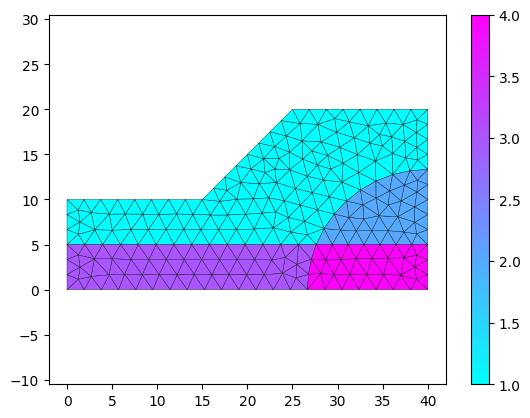

In [4]:
# Plot outside GMSH (only using node_X, node_Y, elem, material):
plt.tripcolor(node_X, node_Y, elem, facecolors=material, edgecolors='k', cmap='cool')
plt.axis('equal')
plt.colorbar()

In [5]:
print(material)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
